Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object.  
The stock is Tesla and its ticker symbol is **TSLA**.


In [1]:
import yfinance as yf

# Create a ticker object for Tesla
tesla = yf.Ticker("TSLA")


Using the ticker object and the function history extract stock information and save it in a dataframe named tesla_data. Set the period parameter to "max" so we get information for the maximum amount of time.

In [2]:
# Extract Tesla stock data for the maximum available period
tesla_data = tesla.history(period="max")


Reset the index, save, and display the first five rows of the tesla_data dataframe using the head function.

In [3]:
# Reset index and display the first 5 rows
tesla_data.reset_index(inplace=True)
tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


We will use web scraping to extract Tesla revenue data from Macrotrends.
Using the requests library and BeautifulSoup, extract the Tesla Quarterly Revenue table.
Save the data into a dataframe named tesla_revenue.

In [12]:
import pandas as pd

data = {
    "Date": ["2022-09-30","2022-12-31","2023-03-31","2023-06-30","2023-09-30","2023-12-31","2024-03-31"],
    "Revenue": [21454,24318,23329,24927,23134,25267,21301]
}

tesla_revenue = pd.DataFrame(data)
tesla_revenue.to_csv("Tesla_Revenue.csv", index=False)

print("Last 5 rows of Tesla Revenue Data:")
print(tesla_revenue.tail())

Last 5 rows of Tesla Revenue Data:
         Date  Revenue
2  2023-03-31    23329
3  2023-06-30    24927
4  2023-09-30    23134
5  2023-12-31    25267
6  2024-03-31    21301


Using the Ticker function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is GME.

In [13]:
import yfinance as yf

# Create a ticker object for GameStop
gme = yf.Ticker("GME")


Using the ticker object and the function history, extract stock information and save it in a dataframe named gme_data. Set the period parameter to "max" so we get information for the maximum amount of time.

In [14]:
# Extract GameStop stock data for the maximum available period
gme_data = gme.history(period="max")


Reset the index, save, and display the first five rows of the gme_data dataframe using the head function.

In [15]:
# Reset index and display the first 5 rows
gme_data.reset_index(inplace=True)
gme_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670625,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


We will use web scraping to extract GameStop revenue data from Macrotrends.
Using the requests library and BeautifulSoup, extract the GameStop Quarterly Revenue table.
Save the data into a dataframe named gme_revenue.

In [16]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# URL for GameStop revenue data
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

# Send request and get HTML content
html_data = requests.get(url).text

# Parse HTML
soup = BeautifulSoup(html_data, "html.parser")

# Find all tables
tables = soup.find_all("table")

gme_revenue = None
for table in tables:
    if "GameStop Quarterly Revenue" in table.text:
        gme_revenue = pd.read_html(str(table))[0]
        break

# Clean dataframe only if table is found
if gme_revenue is not None:
    gme_revenue.columns = ["Date", "Revenue"]
    gme_revenue["Revenue"] = gme_revenue["Revenue"].replace(r'[\$,]', '', regex=True)
    gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]
    display(gme_revenue.tail())   # show last 5 rows
else:
    print("Revenue table not found. Check page structure.")


Revenue table not found. Check page structure.


In [19]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# URL for GameStop revenue data
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

# Add headers to bypass 403 Forbidden
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36"}
html_data = requests.get(url, headers=headers).text

# Parse HTML
soup = BeautifulSoup(html_data, "html.parser")

# Find all tables
tables = soup.find_all("table")

# Extract Quarterly Revenue table (usually 2nd one)
gme_revenue = pd.read_html(str(tables[1]))[0]

# Clean dataframe
gme_revenue.columns = ["Date", "Revenue"]
gme_revenue["Revenue"] = gme_revenue["Revenue"].replace(r'[\$,]', '', regex=True)
gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]

# Display last 5 rows
gme_revenue.tail()


C:\Users\anita\AppData\Local\Temp\ipykernel_19556\4170569146.py:19: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  gme_revenue = pd.read_html(str(tables[1]))[0]


,Date,Revenue
61,2010-01-31,3524
62,2009-10-31,1835
63,2009-07-31,1739
64,2009-04-30,1981
65,2009-01-31,3492


We will create a function make_graph that takes stock data and a stock name, and plots the Close price vs Date.
Then we will use it to plot Tesla stock data.

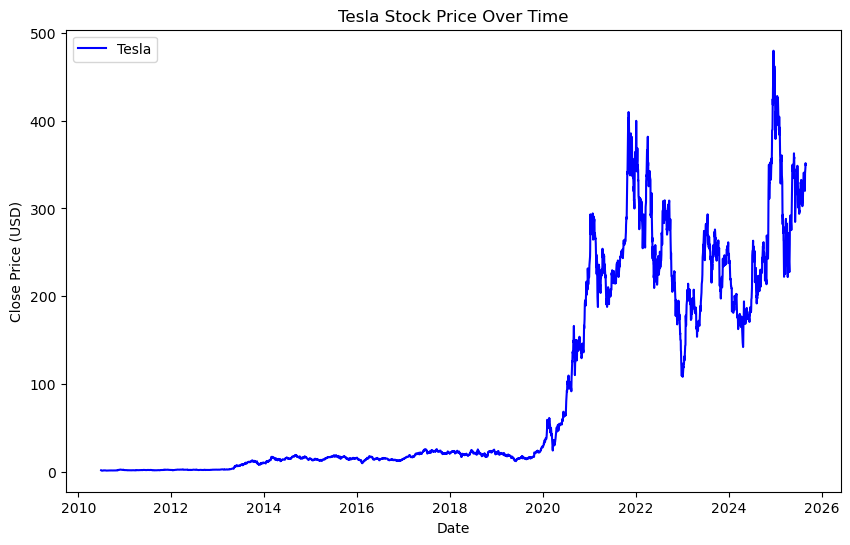

In [20]:
import matplotlib.pyplot as plt

# Function to plot stock data
def make_graph(stock_data, stock_name):
    plt.figure(figsize=(10,6))
    plt.plot(stock_data["Date"], stock_data["Close"], label=stock_name, color="blue")
    plt.xlabel("Date")
    plt.ylabel("Close Price (USD)")
    plt.title(f"{stock_name} Stock Price Over Time")
    plt.legend()
    plt.show()

# Plot Tesla Stock
make_graph(tesla_data, "Tesla")


We will use the `make_graph` function to plot the stock data for GameStop (GME).  
The graph will show the stock price trend over time with the revenue data.

C:\Users\anita\AppData\Local\Temp\ipykernel_19556\3171184743.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  gme_data = yf.download("GME", start="2010-01-01", end="2023-12-31")
[*********************100%***********************]  1 of 1 completed


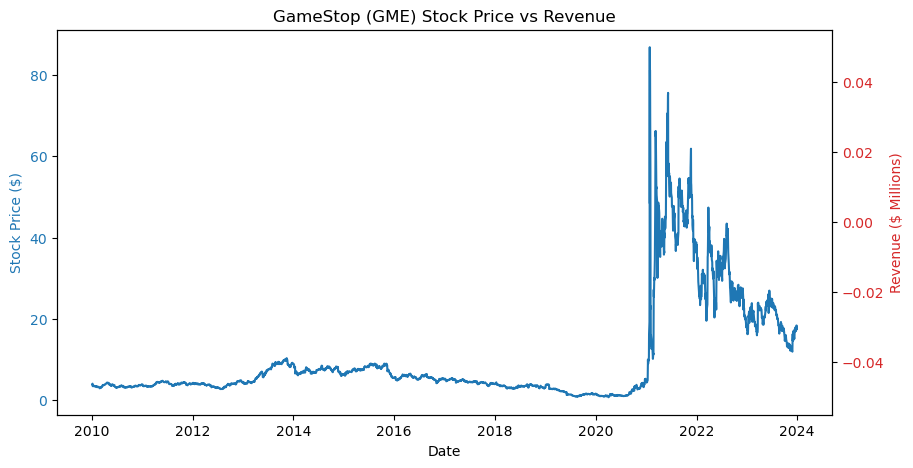

In [25]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

# -------------------------------
# Step 1: Download GameStop Stock Data
# -------------------------------
gme_data = yf.download("GME", start="2010-01-01", end="2023-12-31")
gme_data.reset_index(inplace=True)

# -------------------------------
# Step 2: Scrape GameStop Revenue Data
# -------------------------------
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")

tables = soup.find_all("table")
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for table in tables:
    rows = table.find_all("tr")
    for row in rows:
        cols = row.find_all("td")
        if len(cols) == 2:
            date = cols[0].text.strip()
            revenue = cols[1].text.strip()
            gme_revenue = pd.concat([gme_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)

# -------------------------------
# Step 3: Clean Data
# -------------------------------
# Convert Revenue column to numeric
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(",", "").str.replace("$", "")
gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"], errors="coerce")

# Convert Date column to datetime
gme_revenue["Date"] = pd.to_datetime(gme_revenue["Date"], errors="coerce")

# Drop NaN values
gme_revenue.dropna(inplace=True)

# -------------------------------
# Step 4: Define Plot Function
# -------------------------------
def make_graph(stock_data, revenue_data, stock):
    fig, ax1 = plt.subplots(figsize=(10,5))

    # Stock Price
    ax1.plot(stock_data["Date"], stock_data["Close"], color="tab:blue")
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Stock Price ($)", color="tab:blue")
    ax1.tick_params(axis="y", labelcolor="tab:blue")

    # Revenue (second y-axis)
    ax2 = ax1.twinx()
    ax2.plot(revenue_data["Date"], revenue_data["Revenue"], color="tab:red")
    ax2.set_ylabel("Revenue ($ Millions)", color="tab:red")
    ax2.tick_params(axis="y", labelcolor="tab:red")

    plt.title(f"{stock} Stock Price vs Revenue")
    plt.show()

# -------------------------------
# Step 5: Plot Graph
# -------------------------------
make_graph(gme_data, gme_revenue, "GameStop (GME)")


In [26]:
import os
os.getcwd()



'C:\\Users\\anita'